# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-03 19:56:35--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-03 19:56:36--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-03 19:56:36 (3.74 MB/s) - ‘Eco

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


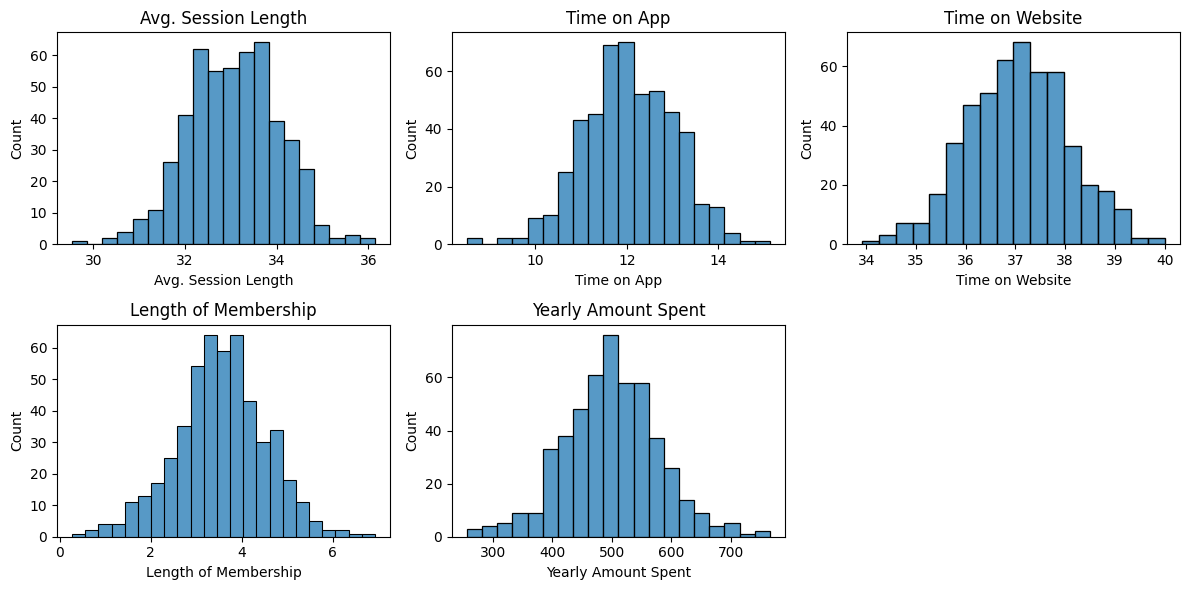

In [4]:


import matplotlib.pyplot as plt
import seaborn as sns


# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['Avg. Session Length'])
plt.title('Avg. Session Length')
plt.subplot(2, 3, 2)
sns.histplot(df['Time on App'])
plt.title('Time on App')
plt.subplot(2, 3, 3)
sns.histplot(df['Time on Website'])
plt.title('Time on Website')
plt.subplot(2, 3, 4)
sns.histplot(df['Length of Membership'])
plt.title('Length of Membership')
plt.subplot(2, 3, 5)
sns.histplot(df['Yearly Amount Spent'])
plt.title('Yearly Amount Spent')
plt.tight_layout() # Ajusta el espaciado
plt.show()


1. Para retener a los nuevos clientes y convertirlos en miembros leales, puedes implementar programas de lealtad, ofrecer comunicación personalizada, incentivos por referencias, experiencias exclusivas, excelente atención al cliente, contenido educativo y valioso, y solicitar feedback para mejoras continuas. Estas estrategias fortalecerán la relación con tus clientes, aumentando su lealtad y el valor que aportan a tu negocio.

2. Sí, un bajo Time on Website comparado con el Time on App puede indicar que la experiencia en el sitio web necesita mejoras. Es importante analizar por qué los usuarios pasan menos tiempo en el sitio web: ¿es la navegación complicada? ¿El contenido no es atractivo? ¿La velocidad de carga es lenta? Mejorar estos aspectos puede aumentar el tiempo que los usuarios pasan en el sitio web, ofreciendo una experiencia más equilibrada entre ambas plataformas.

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [ ]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


Estas columnas son relevantes porque reflejan el comportamiento del usuario: un mayor tiempo promedio de sesión, tiempo en la app y en el sitio web indican más oportunidades de compra, mientras que una mayor antigüedad como miembro sugiere lealtad y confianza, lo que puede traducirse en un mayor gasto anual.

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                  X,  # Asegurar 2D para sklearn
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42
                                              )

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 400 muestras
Prueba: 100 muestras


Con el fin de dar información precisa excluimos ciertos datos pocos pertinentes para la prueba y el entrenamiento.

## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

Si el coeficiente de Time on App es grande y positivo, puedes aprovecharlo optimizando la experiencia del usuario con una interfaz intuitiva y tiempos de carga rápidos, además de implementar gamificación con logros, retos y recompensas. También es clave personalizar el contenido mediante recomendaciones basadas en IA y notificaciones inteligentes, fomentar la interacción social con comunidades y funciones colaborativas, y aplicar estrategias de retención como eventos en vivo y contenido exclusivo. Para mantener el engagement, puedes usar recordatorios, desafíos diarios y notificaciones personalizadas que incentiven el regreso a la app, asegurando así una mayor permanencia y fidelización del usuario.

In [ ]:
# Crear instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): -1044.26
Coeficiente (beta_1): 25.60


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

Si el R² es cercano a 0.80 o 0.90, significa que el modelo explica entre el 80% y 90% de la variabilidad de la variable dependiente, lo que indica un buen ajuste. Sin embargo, un R² alto no garantiza un modelo útil, ya que podría haber problemas como sobreajuste o falta de interpretabilidad. Para determinar si el modelo es "bueno" para tus objetivos, también debes considerar métricas como el error absoluto medio (MAE).

En cuanto a un MAE de 15 USD, si estás prediciendo precios de productos de alto valor como el Year amount spend, un error de 15 USD podría ser insignificante. Es un margen aceptable

In [ ]:
# prompt: Predice en el conjunto de prueba.
# Calcula las métricas MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (código anterior) ...

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")


MSE: 109.86
MAE: 8.56
R^2: 0.98


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

El modelo indica que el gasto anual de los clientes está influenciado por una variable independiente, como puede ser time on app, con un coeficiente positivo de 25.60. Esto significa que por cada unidad adicional en la variable independiente, el gasto anual aumenta en 25.60 USD.

1. ¿Cómo comunicar estos resultados a un equipo directivo sin conocimientos estadísticos?
En lugar de hablar de coeficientes y modelos, explicaría los hallazgos en términos claros y accionables:

"Los clientes que pasan más tiempo en la app tienden a gastar más. Si aumentamos el tiempo en un 10%, podríamos incrementar las ventas en X USD. Para lograrlo, recomendamos mejorar la app y agregar nuevas funciones que incentiven su uso."

También usaría gráficos para mostrar la relación entre variables y el gasto, haciendo la información más visual e intuitiva.

2. ¿Qué acciones concretas aplicarías para aumentar el gasto anual basándote en los coeficientes?

Si Time on App es clave: invertir en la app para mejorar la experiencia y el engagement.
Si Length of Membership es clave: fidelizar con beneficios exclusivos y programas de lealtad.
Si otras variables tienen impacto: ajustar estrategias comerciales basadas en los factores más influyentes.

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

1. ¿Qué variables explican mejor el gasto anual?A partir del modelo de regresión lineal, las variables que mejor explican el Yearly Amount Spent son Length of Membership y Time on App. La antigüedad del cliente en el servicio tiene el coeficiente más alto, lo que indica que los clientes con mayor tiempo de membresía tienden a gastar más. Además, el tiempo en la aplicación también tiene una influencia positiva significativa en el gasto anual. En contraste, Avg. Session Length y Time on Website tienen menor impacto relativo en el gasto, lo que sugiere que la interactividad en la app es más relevante que la navegación en el sitio web.

2. ¿Qué recomendaciones propones para aumentar el Yearly Amount Spent?Para maximizar el gasto anual, se recomienda fortalecer estrategias de retención y optimizar la experiencia en la app. En fidelización, se pueden implementar programas de lealtad con beneficios progresivos y descuentos exclusivos para clientes recurrentes. En cuanto a la aplicación, es clave mejorar la interfaz, personalizar recomendaciones y agregar funciones de gamificación para incentivar su uso. Finalmente, para aumentar la conversión en la web, es importante optimizar el proceso de compra con recomendaciones automatizadas y una experiencia más fluida.

3. Limitaciones: ¿Qué aspectos no cubre el modelo?Si bien el modelo presenta un buen nivel de precisión, tiene algunas limitaciones. En primer lugar, asume una relación lineal entre las variables y el gasto anual, lo que puede no reflejar completamente la realidad. Además, no considera variables adicionales como ingresos del cliente, frecuencia de compra o nivel de satisfacción, que podrían mejorar la predicción. Finalmente, aunque el R² es alto, sigue existiendo un margen de error, lo que sugiere que hay factores no contemplados que influyen en el gasto de los clientes.

En conclusión, el análisis sugiere que la fidelización de clientes y la mejora de la app son claves para aumentar el gasto anual. Se recomienda seguir explorando datos adicionales y probar otros modelos más avanzados para mejorar la precisión de las predicciones.

# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!